https://swcarpentry.github.io/python-novice-inflammation/01-numpy/

- Import a library into a program using import libraryname.
- Use the numpy library to work with arrays in Python.
- Use variable = value to assign a value to a variable in order to record it in memory.
- Variables are created on demand whenever a value is assigned to them.
- Use print(something) to display the value of something.
- The expression array.shape gives the shape of an array.
- Use array[x, y] to select a single element from a 2D array.
- Array indices start at 0, not 1.
- Use low:high to specify a slice that includes the indices from low to high-1.
- All the indexing and slicing that works on arrays also works on strings.
- Use # some kind of explanation to add comments to programs.
- Use numpy.mean(array), numpy.max(array), and numpy.min(array) to calculate simple statistics.
- Use numpy.mean(array, axis=0) or numpy.mean(array, axis=1) to calculate statistics across the specified axis.
- Use the pyplot library from matplotlib for creating simple visualizations.

In [1]:
weight_kg = 55

In [2]:
weight_kg


55

You can use the %whos command at any time to see what variables you have created and what modules you have loaded into the computer’s memory. As this is an IPython command, it will only work if you are in an IPython terminal or the Jupyter Notebook.

In [3]:
%whos

Variable    Type    Data/Info
-----------------------------
weight_kg   int     55


In [10]:
! ls /Users/egortarasenok/Desktop/python-novice-inflammation/data

inflammation-01.csv inflammation-05.csv inflammation-09.csv small-01.csv
inflammation-02.csv inflammation-06.csv inflammation-10.csv small-02.csv
inflammation-03.csv inflammation-07.csv inflammation-11.csv small-03.csv
inflammation-04.csv inflammation-08.csv inflammation-12.csv


In [4]:
import numpy

In [13]:
data = numpy.loadtxt(fname = '/Users/egortarasenok/Desktop/python-novice-inflammation/data/inflammation-01.csv', delimiter=',')

In [14]:
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


In [15]:
print(type(data))

<class 'numpy.ndarray'>


In [16]:
import time
print(time.ctime())

Sun Nov 19 12:25:55 2017


In [17]:
maxval, minval, stdval = numpy.max(data),numpy.min(data),numpy.std(data)

In [18]:
print('maximum inflammation:',maxval)

maximum inflammation: 20.0


In [19]:
print('minimum inflammation:',minval)

minimum inflammation: 0.0


In [20]:
%whos

Variable    Type       Data/Info
--------------------------------
data        ndarray    60x40: 2400 elems, type `float64`, 19200 bytes
maxval      float64    20.0
minval      float64    0.0
numpy       module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
stdval      float64    4.61383319712
time        module     <module 'time' (built-in)>
weight_kg   int        55


How did we know what functions NumPy has and how to use them? If you are working in the IPython/Jupyter Notebook there is an easy way to find out. If you type the name of something followed by a dot, then you can use tab completion (e.g. type numpy. and then press tab) to see a list of all functions and attributes that you can use. After selecting one you can also add a question mark (e.g. numpy.cumprod?) and IPython will return an explanation of the method! This is the same as doing help(numpy.cumprod).

In [26]:
data.sort?
numpy.absolute?

What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left), or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis:

In [29]:
data.shape

(60, 40)

In [28]:
print(numpy.mean(data,axis=0).shape)

(40,)


The expression (40,) tells us we have an N×1 vector, so this is the average inflammation per day for all patients. If we average across axis 1 (columns in our 2D example), we get:

In [31]:
print(numpy.mean(data,axis=1).shape)

(60,)


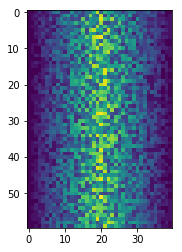

In [32]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()

In [33]:
%matplotlib inline

Here, we have put the average per day across all patients in the variable ave_inflammation,

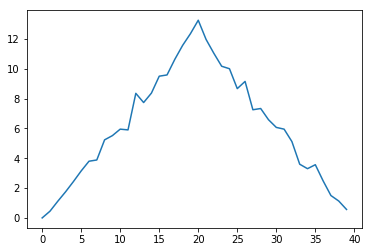

In [34]:
ave_inflamation = numpy.mean(data, axis = 0)
ave_plot = matplotlib.pyplot.plot(ave_inflamation)
matplotlib.pyplot.show()

The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall. Let’s have a look at two other statistics:

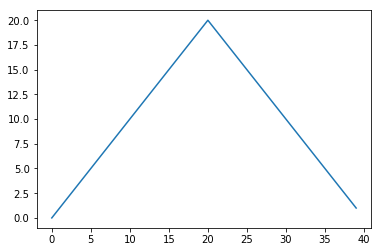

In [36]:
max_plot = matplotlib.pyplot.plot(numpy.max(data,axis=0))
matplotlib.pyplot.show()

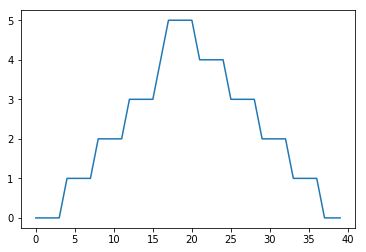

In [38]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis = 0))
matplotlib.pyplot.show()

The maximum value rises and falls perfectly smoothly, while the minimum seems to be a step function. Neither result seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the data without visualization tools.

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function matplotlib.pyplot.figure() creates a space into which we will place all of our plots. The parameter figsize tells Python how big to make this space. Each subplot is placed into the figure using its add_subplot method. The add_subplot method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (axes1, axes2, axes3). Once a subplot is created, the axes can be titled using the set_xlabel() command (or set_ylabel()). Here are our three plots side by side:



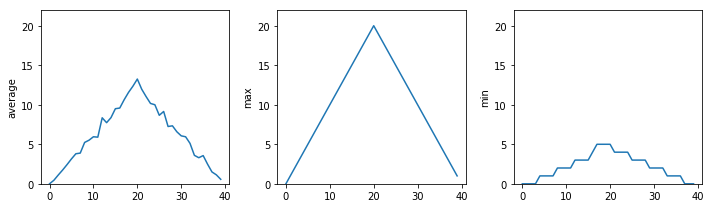

In [48]:
import numpy
import matplotlib.pyplot 

data = numpy.loadtxt(fname = '/Users/egortarasenok/Desktop/python-novice-inflammation/data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize = (10.0, 3.0))
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.set_ylabel('average')
axes1.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes1.plot(numpy.mean(data, axis = 0))

axes2.set_ylabel('max')
axes2.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes2.plot(numpy.max(data,axis=0))
    
axes3.set_ylabel('min')
axes3.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

Why do all of our plots stop just short of the upper end of our graph?

Solution

Because matplotlib normally sets x and y axes limits to the min and max of our data (depending on data range)
If we want to change this, we can use the set_ylim(min, max) method of each ‘axes’, for example:

axes3.set_ylim(0,6)
Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the max and min methods to help.)

In the center and right subplots above, we expect all lines to look like step functions, because non-integer value are not realistic for the minimum and maximum values. However, you can see that the lines are not always vertical or horizontal, and in particular the step function in the subplot on the right looks slanted. Why is this?

Solution

Because matplotlib interpolates (draws a straight line) between the points. One way to do avoid this is to use the Matplotlib drawstyle option:

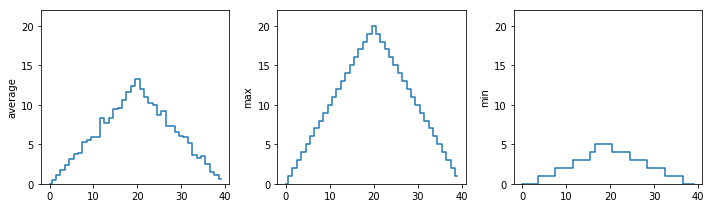

In [50]:
import numpy
import matplotlib.pyplot 

data = numpy.loadtxt(fname = '/Users/egortarasenok/Desktop/python-novice-inflammation/data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min')
axes3.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

matplotlib.pyplot.show()

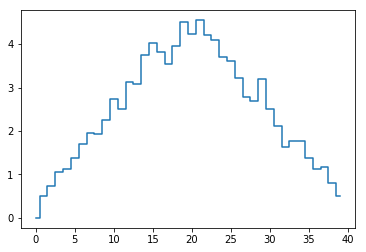

In [54]:
import numpy
import matplotlib.pyplot 

data = numpy.loadtxt(fname = '/Users/egortarasenok/Desktop/python-novice-inflammation/data/inflammation-01.csv', delimiter=',')

stdplot = matplotlib.pyplot.plot(numpy.std(data, axis= 0), drawstyle='steps-mid')

matplotlib.pyplot.show()

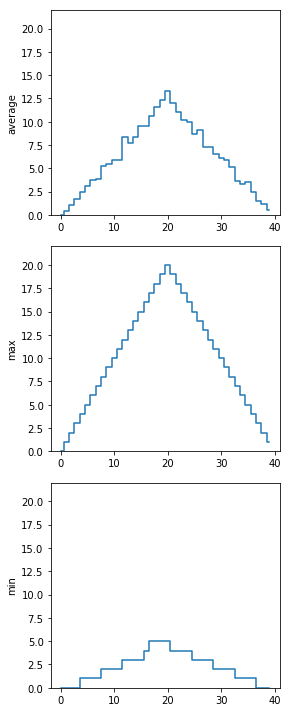

In [92]:
import numpy
import matplotlib.pyplot 

data = numpy.loadtxt(fname = '/Users/egortarasenok/Desktop/python-novice-inflammation/data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(4.0, 10.0))

axes1 = fig.add_subplot(3, 1, 1)
axes2 = fig.add_subplot(3, 1, 2)
axes3 = fig.add_subplot(3, 1, 3)

axes1.set_ylabel('average')
axes1.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes1.plot(numpy.mean(data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes2.plot(numpy.max(data, axis=0), drawstyle='steps-mid')

axes3.set_ylabel('min')
axes3.set_ylim(numpy.min(data),numpy.max(data)*1.1)
axes3.plot(numpy.min(data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

matplotlib.pyplot.show()

In [60]:
import numpy 

A = numpy.array([[1,2,3],[4,5,6],[7,8,9]])
print('A = ')
print(A)

B = numpy.hstack([A,A])
print('B = ')
print(B)

C = numpy.vstack([A,A])
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


A ‘gotcha’ with array indexing is that singleton dimensions are dropped by default. That means A[:, 0] is a one dimensional array, which won’t stack as desired. To preserve singleton dimensions, the index itself can be a slice or array. For example, A[:, :1] returns a two dimensional array with one singleton dimension (i.e. a column vector).



In [75]:
A[:1]

array([[1, 2, 3]])

In [76]:
A[-1]

array([7, 8, 9])

In [78]:
A[:, :1]

array([[1],
       [4],
       [7]])

In [79]:
A[:, -1:]

array([[3],
       [6],
       [9]])

In [81]:
D = numpy.hstack([A[:, :1],A[:, -1:]])
print(D)

[[1 3]
 [4 6]
 [7 9]]


In [83]:
D = numpy.delete(A,1,1)
print(D)

[[1 3]
 [4 6]
 [7 9]]


This patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that change inflammation is a meaningful concept.

The numpy.diff() function takes a NumPy array and returns the difference along a specified axis.

Which axis would it make sense to use this function along?

In [87]:
inf_change = numpy.diff(data, axis= 1)
inf_change.shape

(60, 39)

In [89]:
numpy.max(inf_change,axis= 1)

array([  7.,  12.,  11.,  10.,  11.,  13.,  10.,   8.,  10.,  10.,   7.,
         7.,  13.,   7.,  10.,  10.,   8.,  10.,   9.,  10.,  13.,   7.,
        12.,   9.,  12.,  11.,  10.,  10.,   7.,  10.,  11.,  10.,   8.,
        11.,  12.,  10.,   9.,  10.,  13.,  10.,   7.,   7.,  10.,  13.,
        12.,   8.,   8.,  10.,  10.,   9.,   8.,  13.,  10.,   7.,  10.,
         8.,  12.,  10.,   7.,  12.])

In [90]:
numpy.max(numpy.absolute(numpy.diff(data,axis=1)),axis = 1)

array([ 12.,  14.,  11.,  13.,  11.,  13.,  10.,  12.,  10.,  10.,  10.,
        12.,  13.,  10.,  11.,  10.,  12.,  13.,   9.,  10.,  13.,   9.,
        12.,   9.,  12.,  11.,  10.,  13.,   9.,  13.,  11.,  11.,   8.,
        11.,  12.,  13.,   9.,  10.,  13.,  11.,  11.,  13.,  11.,  13.,
        13.,  10.,   9.,  10.,  10.,   9.,   9.,  13.,  10.,   9.,  10.,
        11.,  13.,  10.,  10.,  12.])